# Experiment

# Setup

## Create df

In [ ]:
FILENAME = 'BTCUSDT_4h_market_direction_index.csv'
WINDOW = 6

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(FILENAME)
df = df.dropna().astype(int)
#df = df[df.iloc[:, -1] != 2]


## Plot correlation matrix

In [ ]:
number_of_indicator = int((len(df.columns)-1) / (WINDOW+1))
df_input_output = df.iloc[:, -number_of_indicator-1:]
df_input = df.iloc[:, -number_of_indicator-1:-1]
df_output = df.iloc[:, -1]

In [ ]:
df_input.shape


(2320, 11)

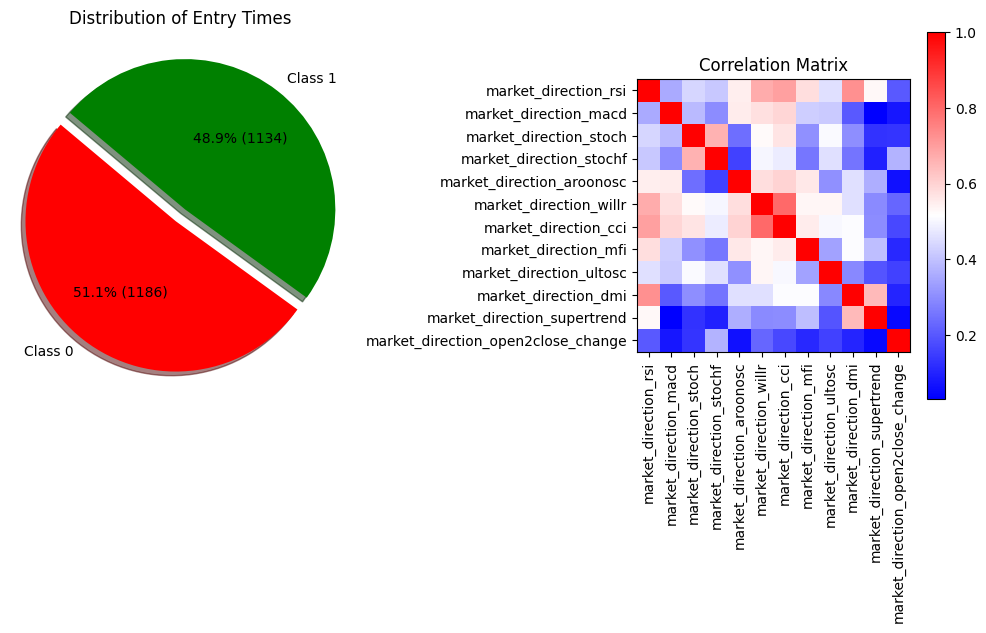

In [ ]:

num_classes = len(df_output.unique())

if num_classes == 2:
    labels = ['Class 0', 'Class 1']
    colors = ['red', 'green']
    explode = (0, 0.1)  # To highlight the 'Good Entry' slice
elif num_classes == 3:
    labels = ['Class 0', 'Class 1', 'Other']
    colors = ['red', 'green', 'blue']
    explode = (0, 0.1, 0)  # To highlight the 'Good Entry' slice
else:
    raise ValueError("Number of classes should be 2 or 3")

value_counts = df_output.value_counts()
total_count = len(df_output)

plt.figure(figsize=(10, 6))  # Adjust the figure size to fit both plots side by side
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, position 1)
plt.pie(value_counts, explode=explode, labels=labels, colors=colors, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * total_count / 100), shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Entry Times')

# Graph 2: Correlation matrix
correlation_matrix = df_input_output.corr()
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, position 2)
plt.imshow(correlation_matrix, cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Matrix")

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

## Training

In [ ]:
import training
training.train_LogisticRegression(df)

Model Accuracy: 0.6909871244635193
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.25      0.36       166
           1       0.69      0.94      0.80       300

    accuracy                           0.69       466
   macro avg       0.69      0.59      0.58       466
weighted avg       0.69      0.69      0.64       466

Confusion Matrix:
[[ 41 125]
 [ 19 281]]
Model saved as logistic_regression_model.joblib


In [ ]:
training.train_XGBClassifier(df)

In [ ]:
training.train_Keras(df)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, timesteps, features)
window_size = 6  # Adjust this based on the lag features used
number_of_features = 11
X_train = X_train.reshape(X_train.shape[0], window_size+1, number_of_features)
X_test = X_test.reshape(X_test.shape[0], window_size+1, number_of_features)

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(window_size+1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(64, input_shape=(window_size+1, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X.shape


(2320, 77)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, timesteps, features)
window_size = 6  # Adjust this based on the lag features used
number_of_features = 11
X_train = X_train.reshape(X_train.shape[0], window_size+1, number_of_features)
X_test = X_test.reshape(X_test.shape[0], window_size+1, number_of_features)

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(window_size+1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(64, input_shape=(window_size+1, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Plot loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# If you have monitored accuracy during training
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

plt.show()


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

15/15 [==============================] - 1s 7ms/step
Accuracy: 0.7068965517241379


In [ ]:
model.save("lstm_IC-145_1.keras")

## Experiment

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)